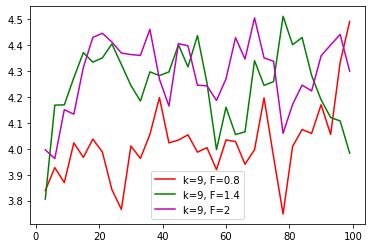

In [55]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

days_avg = 3
# leng = 2044
def pps(file):
    data = pd.read_csv(file, header=None)
    leng = len(data)
    Buyer_ID = ['B00', 'B01','B02','B03','B04','B05','B06','B07','B08','B09','B10','B11','B12','B13','B14']
    Seller_ID = ['S00','S01','S02','S03','S04','S05','S06','S07','S08','S09','S10','S11','S12','S13','S14']
    time_id = 1
    prof_id = 8
    buyer_sum = []
    seller_sum = []
    timeall = []
    row = 0

    while row < leng:
        timeall.append(data.iloc[row, time_id])
        buyer_id = 3
        seller_id = 3
        buy_prof = 8
        seller_prof = 8
        buy_sum = 0.0
        sell_sum = 0.0

        while buyer_id < (len(data.columns)-12):
            if (data.iloc[row, buyer_id]) in Buyer_ID:
                # print(data.iloc[a,trader_id])
                buy_sum += data.iloc[row,buy_prof]
                # print(data.iloc[a,prof_id])
            buyer_id = buyer_id + 7
            prof_id = prof_id + 7
        buyer_sum.append(buy_sum)

        while seller_id < (len(data.columns)-12):
            if (data.iloc[row, seller_id]) in Seller_ID:
                # print(data.iloc[0,trader_id])
                sell_sum+= data.iloc[row,seller_prof]
                # print(data.iloc[0,prof_id])
            seller_id = seller_id + 7
            seller_prof = seller_prof + 7
        seller_sum.append(sell_sum)
        row += 1

    total_prof = []
    for i in range(0, len(buyer_sum)):
        total_prof.append(buyer_sum[i]+seller_sum[i])

    buy_avg = moving_average(buyer_sum,leng)
    sell_avg = moving_average(seller_sum, leng)
    total_avg = moving_average(total_prof, leng)
    t = gen_time(leng)

    return t, buy_avg, sell_avg, total_avg

def moving_average(sum0,leng):
    a = 0
    c = 0
    d = 0
    b = 0
    total = 0
    avg = []
    hours = 24 * days_avg
    day_interval = round(leng / hours)
    # print(day_interval)
    while c < day_interval:
        while a < hours:
            if d < leng:
                total += sum0[d]
                d += 1
            a += 1
        c += 1
        a = 0
        avg.append(total/hours)
        total = 0
    return avg

def gen_time(leng):
    time = []
    a = 0
    hours = 24 * days_avg
    day_interval = round(leng / hours)
    t = days_avg
    while a < day_interval:
        time.append(t)
        t += days_avg
        a +=1
    return time
    
def plot_pps():
#     t, x, y, z = pps('15PRDE4K.2F1_strats.csv')
#     fig, ax = plt.subplots()
# #     ax.plot(t, x, 'k-', label='sell')
# #     ax.plot(t, y, 'k-', label='buy')
#     ax.plot(t, z, 'b-', label='.2')

#     t, x, y, z = pps('15PRDE4K.8F1_strats.csv')
# #     ax.plot(t, x, 'k-', label='sell')
# #     ax.plot(t, y, 'k-', label='buy')
#     ax.plot(t, z, 'r-', label='.8')

#     t, x, y, z = pps('15PRDE4K1.4F1_strats.csv')
# #     ax.plot(t, x, 'k-', label='sell')
# #     ax.plot(t, y, 'k-', label='buy')
#     ax.plot(t, z, 'g-', label='1.4')

#     t, x, y, z = pps('15PRDE4K2F7_strats.csv')
# #     ax.plot(t, x, 'k-', label='sell')
# #     ax.plot(t, y, 'k-', label='buy')
#     ax.plot(t, z, 'm-', label='2')

    k=9
    
    fig, ax = plt.subplots()
    t, x, y, z = pps('15PRDE'+str(k)+'K.8F1_strats.csv')
    ax.plot(t, z, 'r-', label= 'k='+ str(k)+', F=0.8')

    t, x, y, z = pps('15PRDE'+str(k)+'K1.4F1_strats.csv')
    ax.plot(t, z, 'g-', label= 'k='+ str(k)+', F=1.4')

    t, x, y, z = pps('15PRDE'+str(k)+'K2F1_strats.csv')
    ax.plot(t, z, 'm-', label= 'k='+ str(k)+', F=2')
    ax.legend()
    
#     plt.xlabel('Time')
#     plt.ylabel('Total profit')
#     plt.savefig('plots/allPRDEK14.png')

plot_pps()
